# Boxplot visualizations of FGSM attacks on models trained with reversed distillation vs models trained without distillation

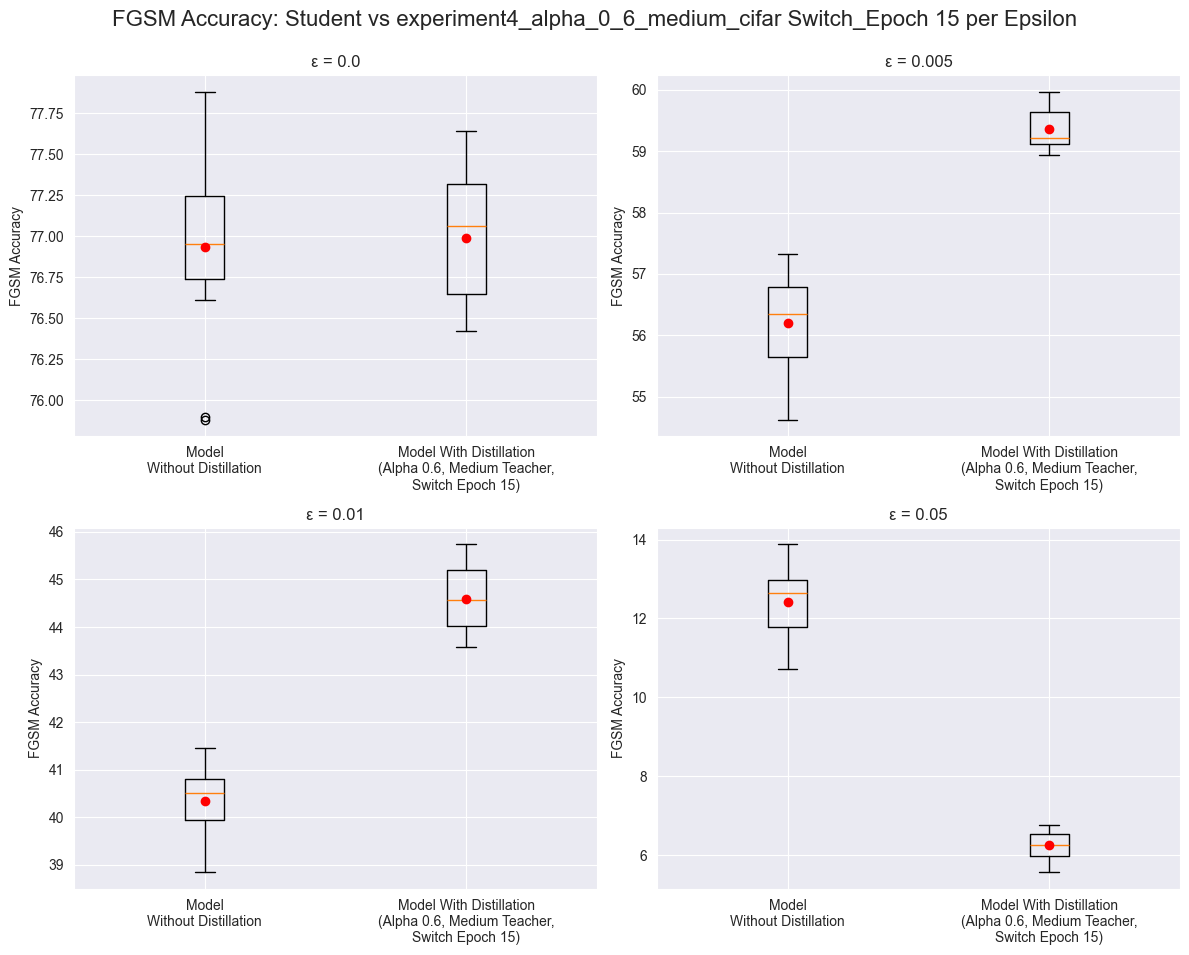

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

all_results = []

for dirpath, _, filenames in os.walk("../outputs/student_cifar"):
    if "fgsm_results.csv" in filenames:
        csv_path = os.path.join(dirpath, "fgsm_results.csv")
        df = pd.read_csv(csv_path)
        df["source"] = "student"
        all_results.append(df)

experiment_name = "experiment4_alpha_0_6_medium_cifar"
for dirpath, _, filenames in os.walk(f"../outputs/{experiment_name}"):
    if ("fgsm_results.csv" in filenames) and ("switch_epoch_15" in os.path.basename(dirpath)):
        csv_path = os.path.join(dirpath, "fgsm_results.csv")
        df = pd.read_csv(csv_path)
        df["source"] = "experiment"
        all_results.append(df)

results_df = pd.concat(all_results, ignore_index=True)
results_df["epsilon"] = results_df["epsilon"].astype(str)

epsilons_sorted = sorted(results_df["epsilon"].unique(), key=lambda x: float(x))

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, epsilon in enumerate(epsilons_sorted):
    ax = axs[i // 2, i % 2] 
    data_student = results_df[(results_df["epsilon"] == epsilon) & (results_df["source"] == "student")]["accuracy"]
    data_experiment = results_df[(results_df["epsilon"] == epsilon) & (results_df["source"] == "experiment")]["accuracy"]

    ax.boxplot([data_student, data_experiment], tick_labels=["Model\nWithout Distillation", f"Model With Distillation\n(Alpha 0.6, Medium Teacher,\nSwitch Epoch 15)"])
    
    mean_student = data_student.mean()
    mean_experiment = data_experiment.mean()
    
    ax.scatter([1], [mean_student], color="red", zorder=5, label="Mean (student)" if i == 0 else "")
    ax.scatter([2], [mean_experiment], color="red", zorder=5, label="Mean (experiment)" if i == 0 else "")
    ax.set_title(f"ε = {epsilon}")
    ax.set_ylabel("FGSM Accuracy")
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Prostor pro titulek
plt.savefig(f"../graphs/fgsm/fgsm_alpha_0_6_medium_cifar_15.pdf", bbox_inches="tight")
plt.suptitle(f"FGSM Accuracy: Student vs {experiment_name} Switch_Epoch 15 per Epsilon", fontsize=16)
plt.show()

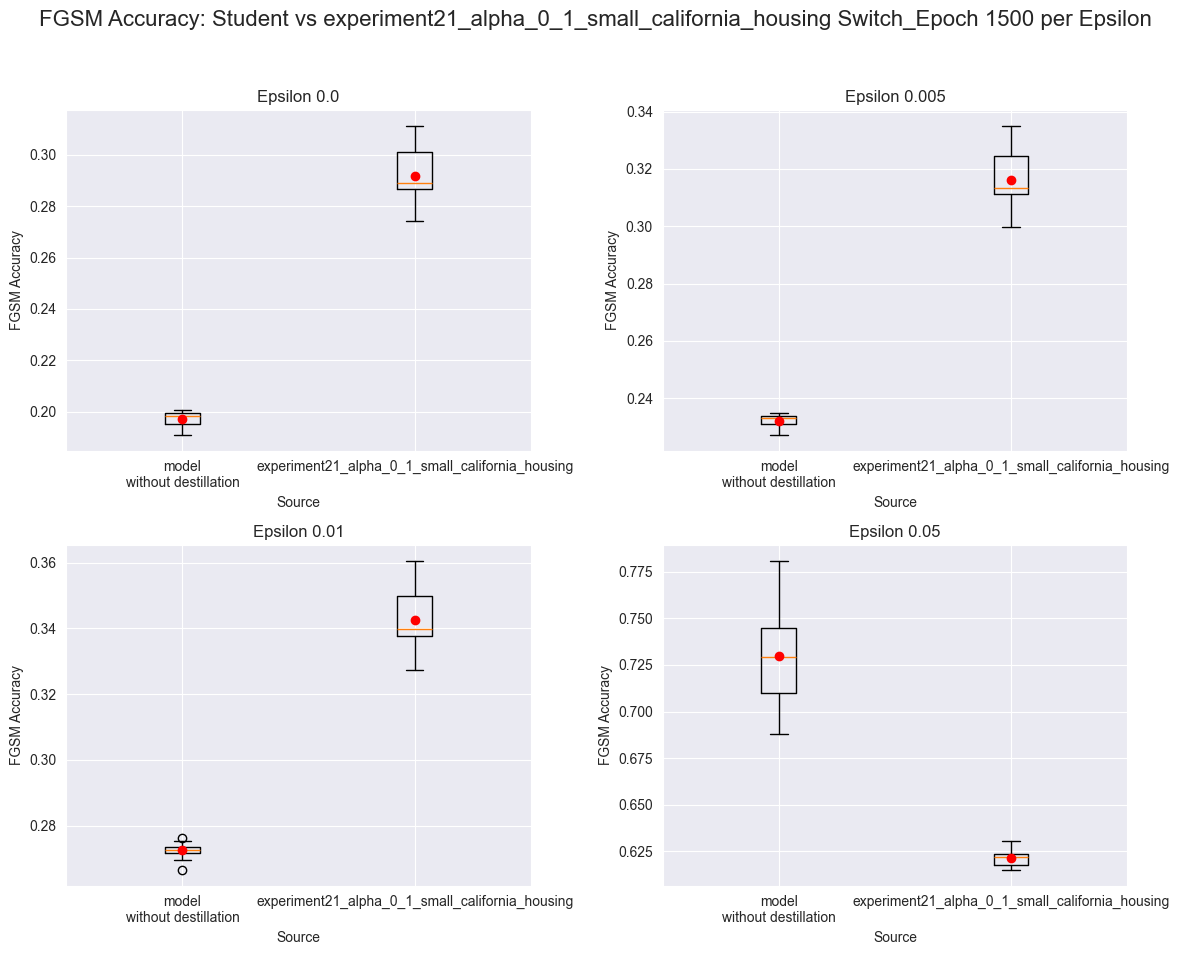

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

all_results = []

for dirpath, _, filenames in os.walk("../outputs/student_california_housing"):
    if "fgsm_results.csv" in filenames:
        csv_path = os.path.join(dirpath, "fgsm_results.csv")
        df = pd.read_csv(csv_path)
        df["source"] = "student"
        all_results.append(df)

experiment_name = "experiment21_alpha_0_1_small_california_housing"
for dirpath, _, filenames in os.walk(f"../outputs/{experiment_name}"):
    if ("fgsm_results.csv" in filenames) and ("switch_epoch_1500" in os.path.basename(dirpath)):
        csv_path = os.path.join(dirpath, "fgsm_results.csv")
        df = pd.read_csv(csv_path)
        df["source"] = "experiment"
        all_results.append(df)

results_df = pd.concat(all_results, ignore_index=True)
results_df["epsilon"] = results_df["epsilon"].astype(str)

epsilons_sorted = sorted(results_df["epsilon"].unique(), key=lambda x: float(x))

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, epsilon in enumerate(epsilons_sorted):
    ax = axs[i // 2, i % 2]
    data_student = results_df[(results_df["epsilon"] == epsilon) & (results_df["source"] == "student")]["accuracy"]
    data_experiment = results_df[(results_df["epsilon"] == epsilon) & (results_df["source"] == "experiment")]["accuracy"]

    ax.boxplot([data_student, data_experiment], tick_labels=["model\nwithout destillation", f"{experiment_name}"])
    
    mean_student = data_student.mean()
    mean_experiment = data_experiment.mean()
    
    ax.scatter([1], [mean_student], color="red", zorder=5, label="Mean (student)" if i == 0 else "")
    ax.scatter([2], [mean_experiment], color="red", zorder=5, label="Mean (experiment)" if i == 0 else "")
    ax.set_title(f"Epsilon {epsilon}")
    ax.set_xlabel("Source")
    ax.set_ylabel("FGSM Accuracy")
    ax.grid(True)

plt.suptitle(f"FGSM Accuracy: Student vs {experiment_name} Switch_Epoch 1500 per Epsilon", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Prostor pro titulek
plt.show()